First lets import poloto.

In [2]:
:dep poloto

Next import evcxr rendering for poloto.

In [3]:
:dep poloto-evcxr
use poloto_evcxr::prelude::*;

Now lets make a simple function that just displays one plot to avoid having to write alot of boilerplate.

In [4]:
// import hypermelon crate so that we can manually append elements.
:dep hypermelon
fn show(it:impl IntoIterator<Item=[f64;2]>){
    
    use hypermelon::prelude::*;
    let j=poloto::build::plot("a").line(it.into_iter());
    let svg = poloto::header().with_dim([400.0,300.0]);
    let style=poloto::render::Theme::dark();
    let res=poloto::frame()
        .with_tick_lines([true, true])
        .build()
        .data(j)
        .build_and_label(("hello","x","y"));
    res.append_to(svg.append(style)).render_evcxr();
}

Ok now lets plot some data.

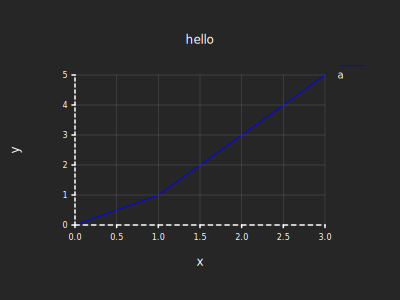

In [5]:
let data=vec!([0.0,0.0],[1.0,1.0],[3.0,5.0]);
show(data);

Ok cool. Now lets change the data.

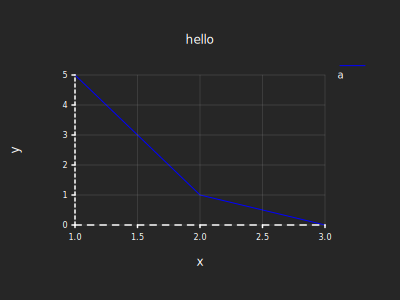

In [6]:
let data=vec!([1.0,5.0],[2.0,1.0],[3.0,0.0]);
show(data);

Oh no now the data is going down!